In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [2]:
 print(os.listdir("/content/gdrive/MyDrive/alphabet"))
data_dir=r"/content/gdrive/MyDrive/alphabet"
data_dir = pathlib.Path(data_dir)

['q', 'z', 'v', 's', 'x', 'r', 't', 'u', 'w', 'y', 'm', 'p', 'h', 'k', 'n', 'g', 'l', 'i', 'j', 'o', 'd', 'c', 'f', 'b', 'a', 'e']


In [3]:
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)

1815


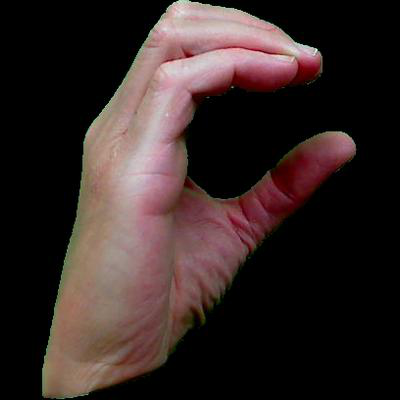

In [4]:
alphabetc = list(data_dir.glob('c/*'))
PIL.Image.open(str(alphabetc[0]))

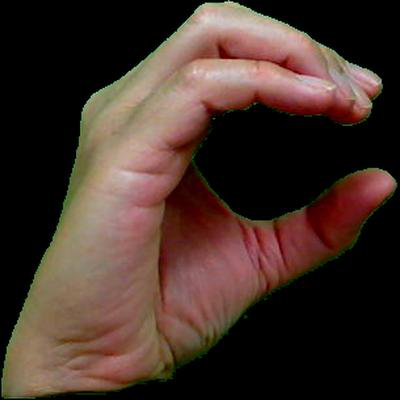

In [5]:
PIL.Image.open(str(alphabetc[1]))

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1815 files belonging to 26 classes.
Using 1452 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1815 files belonging to 26 classes.
Using 363 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


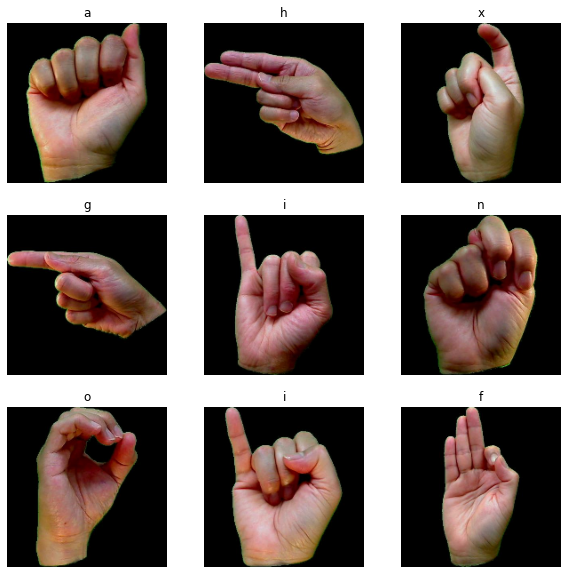

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [12]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9872912


In [13]:
num_classes = 26

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [16]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
46/46 [==============================] - 7s 96ms/step - loss: 2.0753 - accuracy: 0.4300 - val_loss: 0.4945 - val_accuracy: 0.8650
Epoch 2/10
46/46 [==============================] - 4s 86ms/step - loss: 0.2459 - accuracy: 0.9378 - val_loss: 0.2140 - val_accuracy: 0.9477
Epoch 3/10
46/46 [==============================] - 4s 86ms/step - loss: 0.0444 - accuracy: 0.9840 - val_loss: 0.1671 - val_accuracy: 0.9559
Epoch 4/10
46/46 [==============================] - 4s 86ms/step - loss: 0.0069 - accuracy: 0.9989 - val_loss: 0.1377 - val_accuracy: 0.9752
Epoch 5/10
46/46 [==============================] - 4s 86ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1403 - val_accuracy: 0.9752
Epoch 6/10
46/46 [==============================] - 4s 86ms/step - loss: 4.4598e-04 - accuracy: 1.0000 - val_loss: 0.1487 - val_accuracy: 0.9752
Epoch 7/10
46/46 [==============================] - 4s 86ms/step - loss: 1.8617e-04 - accuracy: 1.0000 - val_loss: 0.1499 - val_accuracy: 0.9752
Epoch

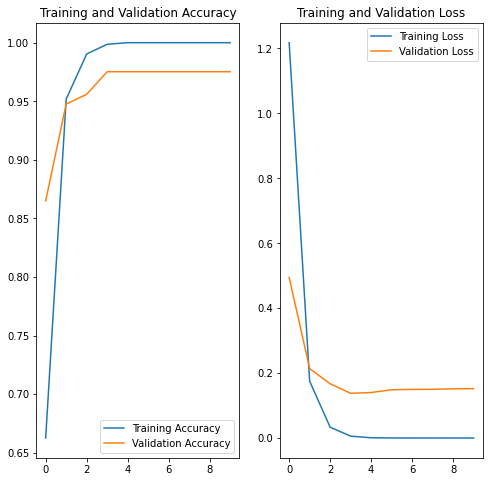

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()